Ovo je notebook vezan za istraživanje podataka u [datasetu](https://www.kaggle.com/datasets/jonathanoheix/face-expression-recognition-dataset/data)

Pokrenut je putem google colab platforme, mada bi verovatno moglo i lokalno (ne bih pokusavao, vise bih samo razgledao ovaj notebook)

Moze se ucitati putem Visual studio code-a npr

In [1]:
from google.colab import drive
drive.mount('/content/drive')
# Imam zip sa arhivom koju sam skinuo sa linka na svom gugl drajvu pa je anzipujem u okruzenje
!unzip /content/drive/MyDrive/archive1.zip -d /content/

Streaming output truncated to the last 5000 lines.
 extracting: /content/archive1/images/validation/fear/9040.jpg  
 extracting: /content/archive1/images/validation/fear/9101.jpg  
 extracting: /content/archive1/images/validation/fear/911.jpg  
 extracting: /content/archive1/images/validation/fear/9179.jpg  
 extracting: /content/archive1/images/validation/fear/9205.jpg  
 extracting: /content/archive1/images/validation/fear/9232.jpg  
 extracting: /content/archive1/images/validation/fear/9251.jpg  
 extracting: /content/archive1/images/validation/fear/9261.jpg  
 extracting: /content/archive1/images/validation/fear/9281.jpg  
 extracting: /content/archive1/images/validation/fear/9302.jpg  
 extracting: /content/archive1/images/validation/fear/9333.jpg  
 extracting: /content/archive1/images/validation/fear/9369.jpg  
 extracting: /content/archive1/images/validation/fear/9370.jpg  
 extracting: /content/archive1/images/validation/fear/9474.jpg  
 extracting: /content/archive1/images/va

Anzipovano izgleda na kraju otprilke ovako:

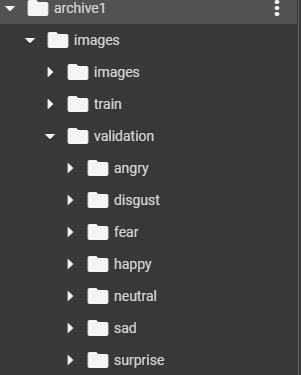

In [46]:
import os
import cv2
import numpy as np
import pandas as pd

# uzeo sam konkretno validation jer ima folder manje slika pa se brze izvrsi (traje i dalje 6 minuta)
data_dir = '/content/archive1/images/validation/'

def extract_features(image_path):
    # ucitavanje slike
    image = cv2.imread(image_path)

    # raspodela slike i sracunavanje
    color_hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    color_hist = color_hist.flatten()  # Flatten the histogram

    # osvetljenje
    brightness = np.mean(image)

    # broj kontura
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray_image, 100, 200)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    num_contours = len(contours)

    return color_hist, brightness, num_contours

# pravimo dataframe
columns = ['color_hist_' + str(i) for i in range(512)] + ['brightness', 'num_contours', 'emotion']
df = pd.DataFrame(columns=columns)

# iteracijom kroz subfoldere validacije
for emotion in os.listdir(data_dir):
    emotion_dir = os.path.join(data_dir, emotion)
    if os.path.isdir(emotion_dir):
        for image_file in os.listdir(emotion_dir):
            image_path = os.path.join(emotion_dir, image_file)
            color_hist, brightness, num_contours = extract_features(image_path)

            # kombinujemo sve u jednu listu
            features = list(color_hist) + [brightness, num_contours, emotion]
            print(image_path)
            # Appendujemo na kraj dataframe-a
            df.loc[len(df)] = features

df.head()

Streaming output truncated to the last 5000 lines.
/content/archive1/images/validation/neutral/2273.jpg
/content/archive1/images/validation/neutral/35628.jpg
/content/archive1/images/validation/neutral/1874.jpg
/content/archive1/images/validation/neutral/4137.jpg
/content/archive1/images/validation/neutral/18791.jpg
/content/archive1/images/validation/neutral/33049.jpg
/content/archive1/images/validation/neutral/30850.jpg
/content/archive1/images/validation/neutral/25573.jpg
/content/archive1/images/validation/neutral/9712.jpg
/content/archive1/images/validation/neutral/33870.jpg
/content/archive1/images/validation/neutral/25678.jpg
/content/archive1/images/validation/neutral/33052.jpg
/content/archive1/images/validation/neutral/6813.jpg
/content/archive1/images/validation/neutral/24232.jpg
/content/archive1/images/validation/neutral/6934.jpg
/content/archive1/images/validation/neutral/32855.jpg
/content/archive1/images/validation/neutral/30581.jpg
/content/archive1/images/validation/n

,color_hist_0,color_hist_1,color_hist_2,color_hist_3,color_hist_4,color_hist_5,color_hist_6,color_hist_7,color_hist_8,color_hist_9,...,color_hist_505,color_hist_506,color_hist_507,color_hist_508,color_hist_509,color_hist_510,color_hist_511,brightness,num_contours,emotion
0,343.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.845486,22,happy
1,162.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,635.0,154.326389,19,happy
2,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,57.0,163.910590,15,happy
3,471.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,14.0,90.114149,20,happy
4,59.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,684.0,182.359809,21,happy


In [47]:
summary_stats = df.describe()
summary_stats

,color_hist_0,color_hist_1,color_hist_2,color_hist_3,color_hist_4,color_hist_5,color_hist_6,color_hist_7,color_hist_8,color_hist_9,...,color_hist_504,color_hist_505,color_hist_506,color_hist_507,color_hist_508,color_hist_509,color_hist_510,color_hist_511,brightness,num_contours
count,7066.000000,7066.0,7066.0,7066.0,7066.0,7066.0,7066.0,7066.0,7066.0,7066.0,...,7066.0,7066.0,7066.0,7066.0,7066.0,7066.0,7066.0,7066.000000,7066.000000,7066.000000
mean,200.643219,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,152.088730,129.803325,18.169261
std,247.814621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,231.171585,33.495547,5.924478
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,25.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,107.378581,14.000000
50%,108.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.000000,130.018229,18.000000
75%,286.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,221.000000,152.500868,22.000000
max,2304.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2171.000000,244.805990,43.000000


Ovo je saznanje, grayscale slike imaju samo jedan kanal i zato su vrednosti za skoro sve osim dve kolone jednake nuli

In [48]:
df.drop(columns=[f'color_hist_{i}' for i in range(1, 511)], inplace=True)

In [49]:
df.head()

,color_hist_0,color_hist_511,brightness,num_contours,emotion
0,343.0,0.0,98.845486,22,happy
1,162.0,635.0,154.326389,19,happy
2,24.0,57.0,163.910590,15,happy
3,471.0,14.0,90.114149,20,happy
4,59.0,684.0,182.359809,21,happy


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Ovde definisem neke vizuelizacije za datafrejm koji imamo

def get_random_color():
    return tuple(np.random.rand(3))

def plot_histograms(df):
    emotions = df['emotion'].unique()
    num_bins = 20

    for emotion in emotions:
        fig, axs = plt.subplots(1, 3, figsize=(15, 5))

        color = get_random_color()
        axs[0].hist(df[df['emotion'] == emotion]['brightness'], bins=num_bins, alpha=0.5, color=color)
        axs[1].hist(df[df['emotion'] == emotion]['num_contours'], bins=num_bins, alpha=0.5, color=color)
        axs[2].hist(df[df['emotion'] == emotion]['color_hist_0'], bins=num_bins, alpha=0.5, color=color)

        axs[0].set_title('Brightness Distribution - ' + emotion)
        axs[1].set_title('Num_contours Distribution - ' + emotion)
        axs[2].set_title('Color Histogram Distribution - ' + emotion)

        plt.tight_layout()
        plt.show()

def plot_boxplots(df):
    plt.figure(figsize=(15, 5))
    sns.boxplot(data=df, x='emotion', y='brightness', palette='husl')
    plt.title('Brightness Box Plot by Emotion')
    plt.xlabel('Emotion')
    plt.ylabel('Brightness')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_scatter(df):
    plt.figure(figsize=(20, 15))
    emotions = df['emotion'].unique()

    for emotion in emotions:
        color = get_random_color()
        sns.scatterplot(data=df[df['emotion'] == emotion], x='brightness', y='num_contours', hue='emotion', palette=[color])

    plt.title('Scatter Plot: Brightness vs Num_contours')
    plt.show()

def plot_bar_chart(df):
    plt.figure(figsize=(10, 5))
    emotions = df['emotion'].unique()

    for emotion in emotions:
        color = get_random_color()
        sns.barplot(data=df[df['emotion'] == emotion], x='emotion', y='brightness', color=color)

    plt.title('Average Brightness by Emotion')
    plt.show()

def plot_heatmap(df):
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.drop(columns=['emotion'], axis=1).corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

def plot_pairplots(df):
    emotions = df['emotion'].unique()

    for emotion in emotions:
        subset = df[df['emotion'] == emotion]
        plt.figure(figsize=(10, 8))
        sns.pairplot(subset, height=2.5)
        plt.suptitle('Pairplot for ' + emotion, fontsize=16)
        plt.show()



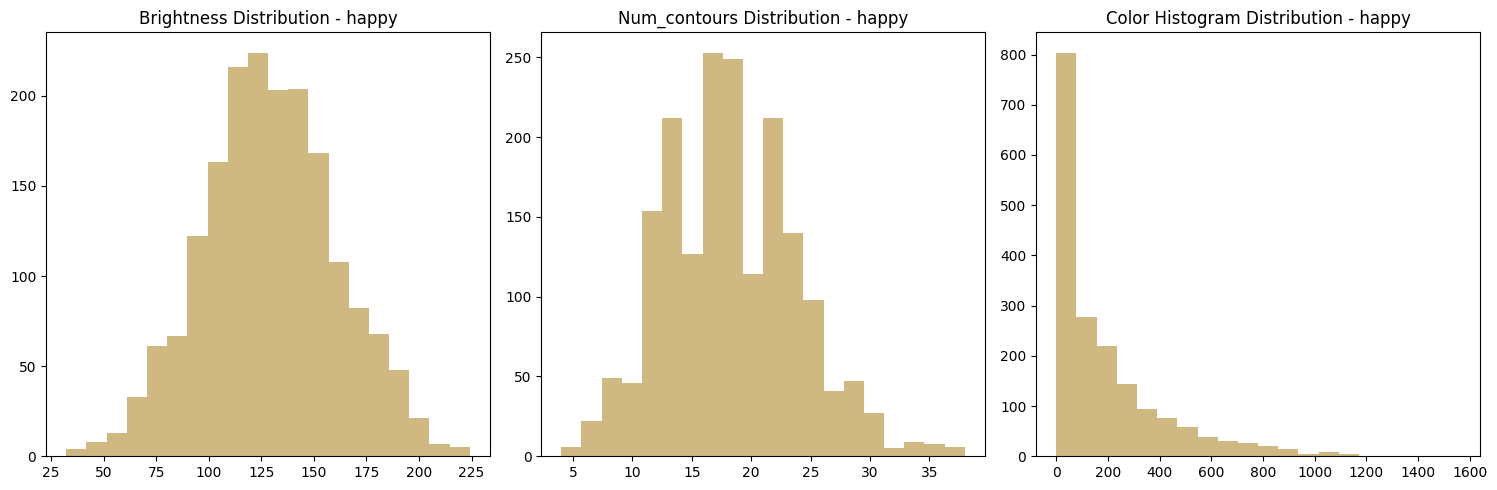

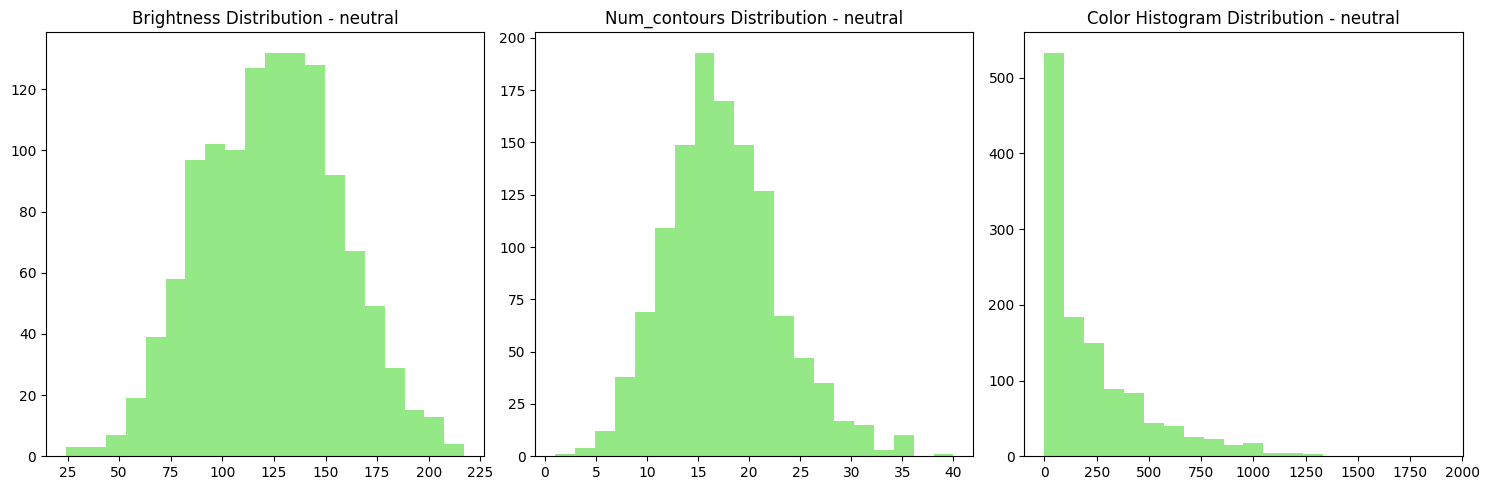

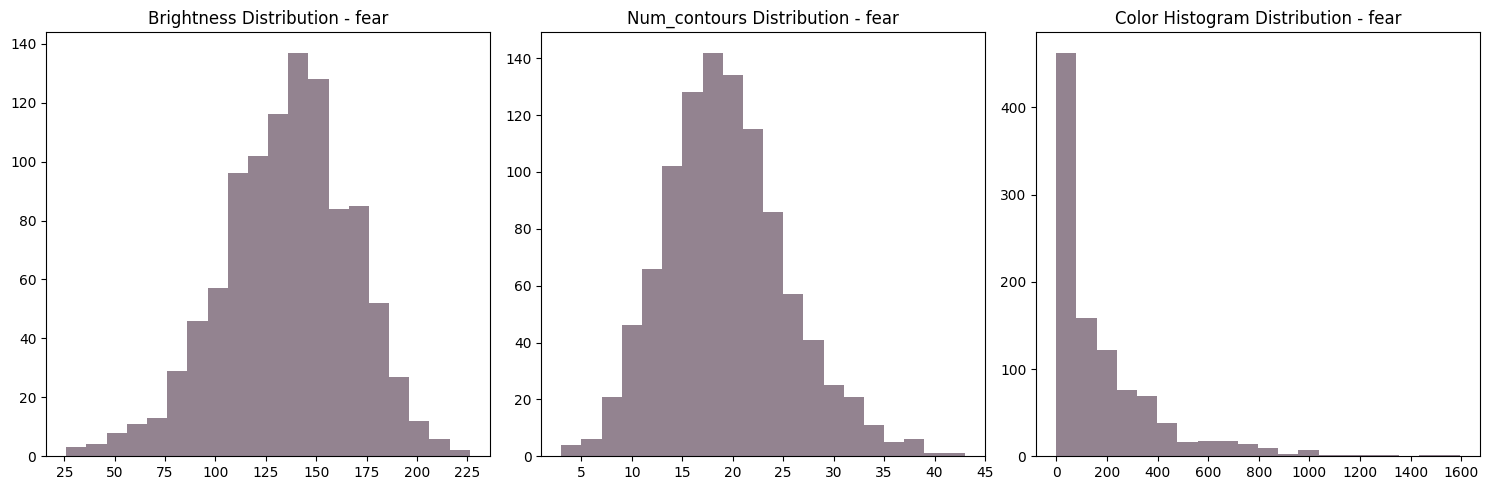

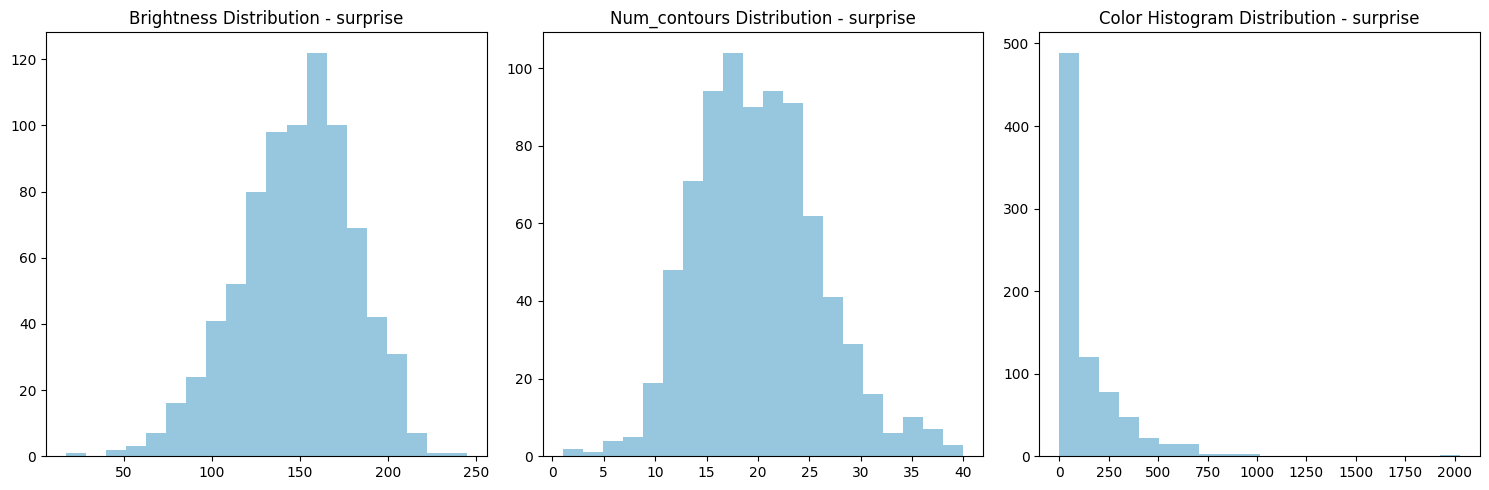

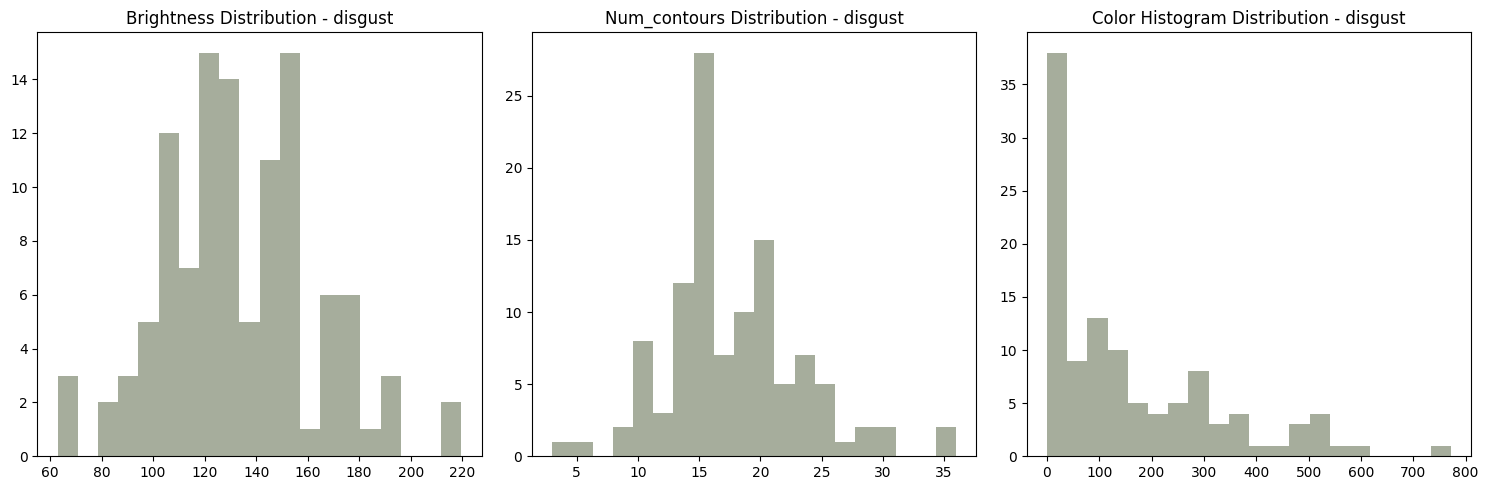

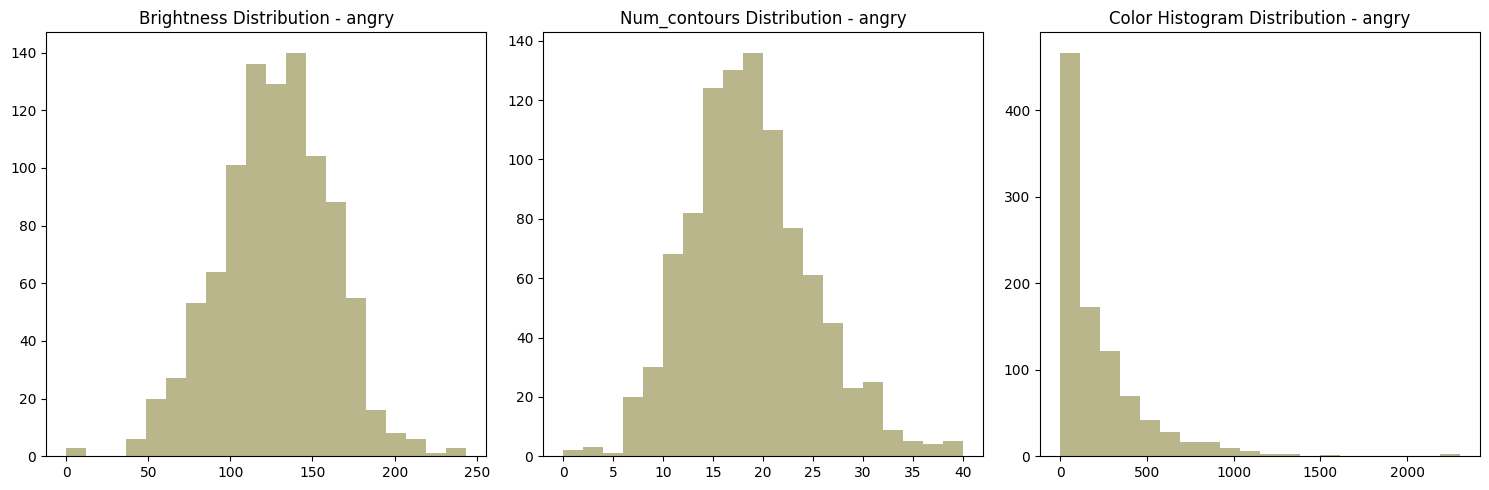

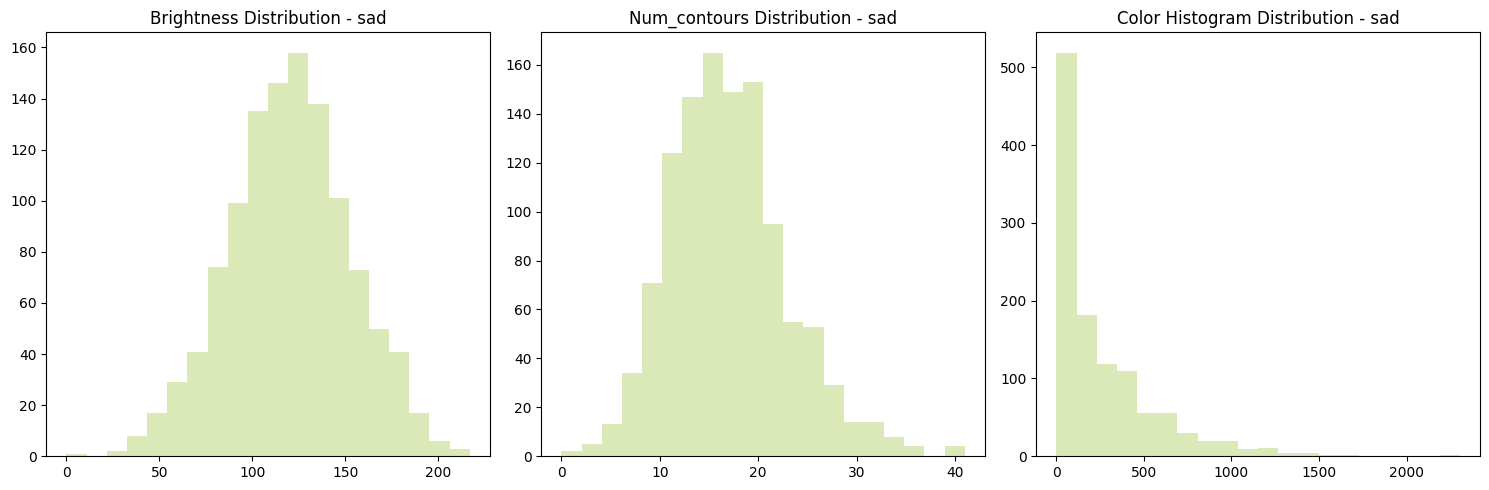

<ipython-input-50-124710d2c04d>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='emotion', y='brightness', palette='husl')


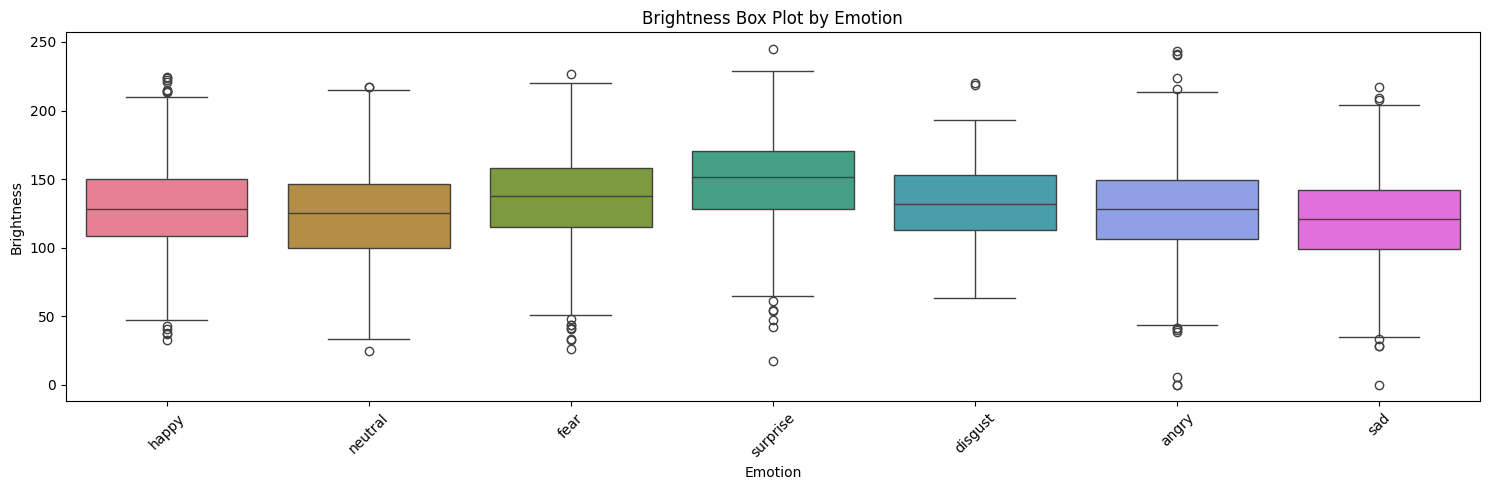

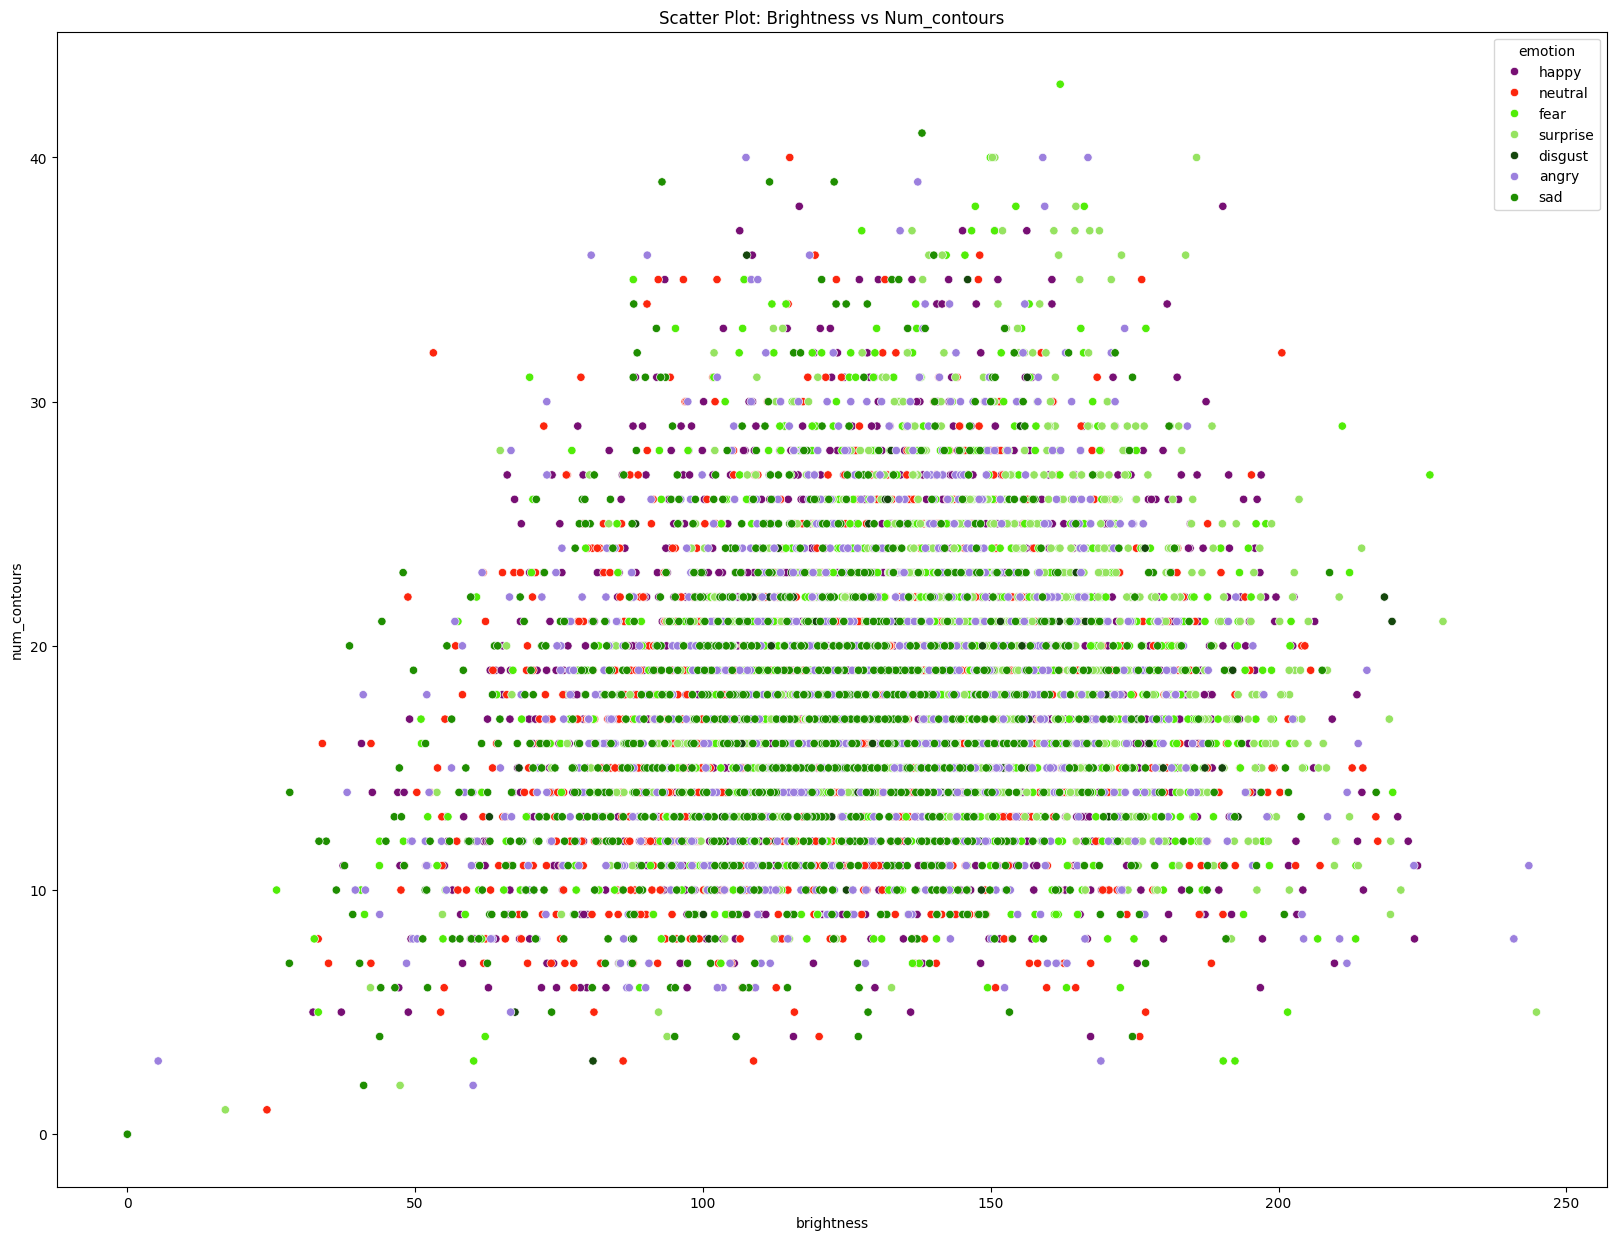

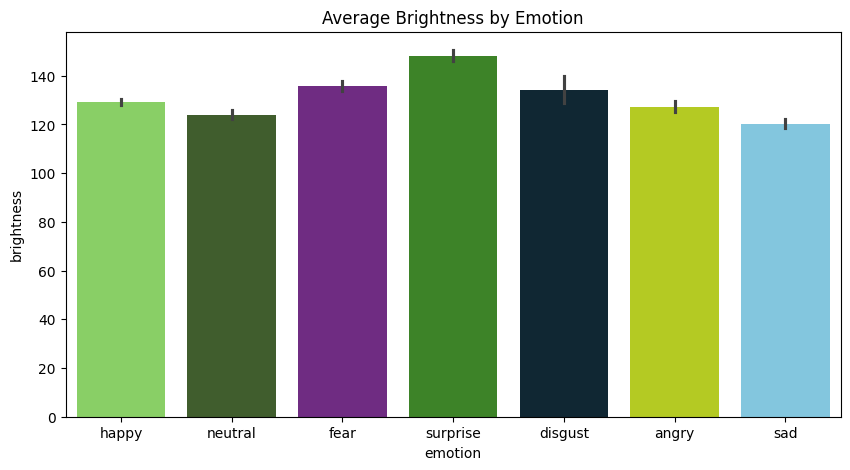

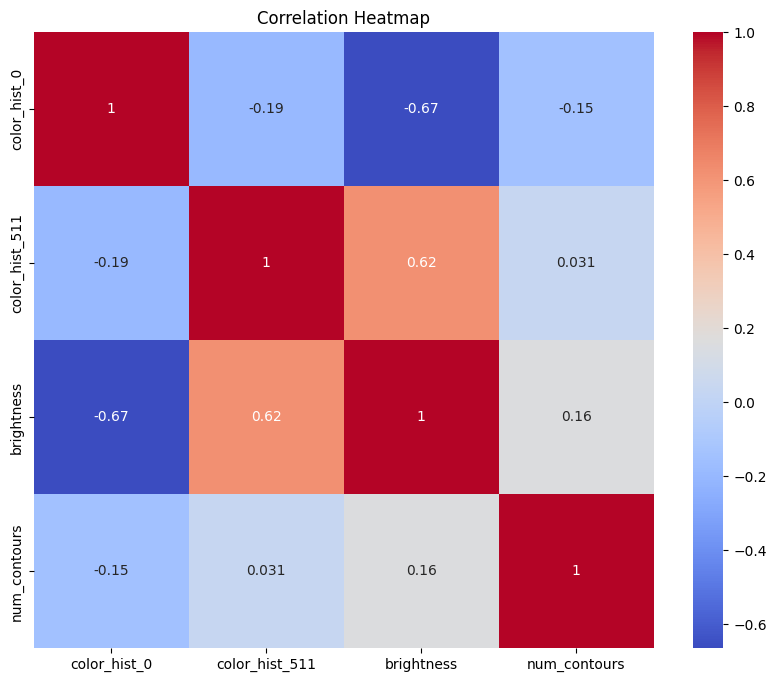

<Figure size 1000x800 with 0 Axes>

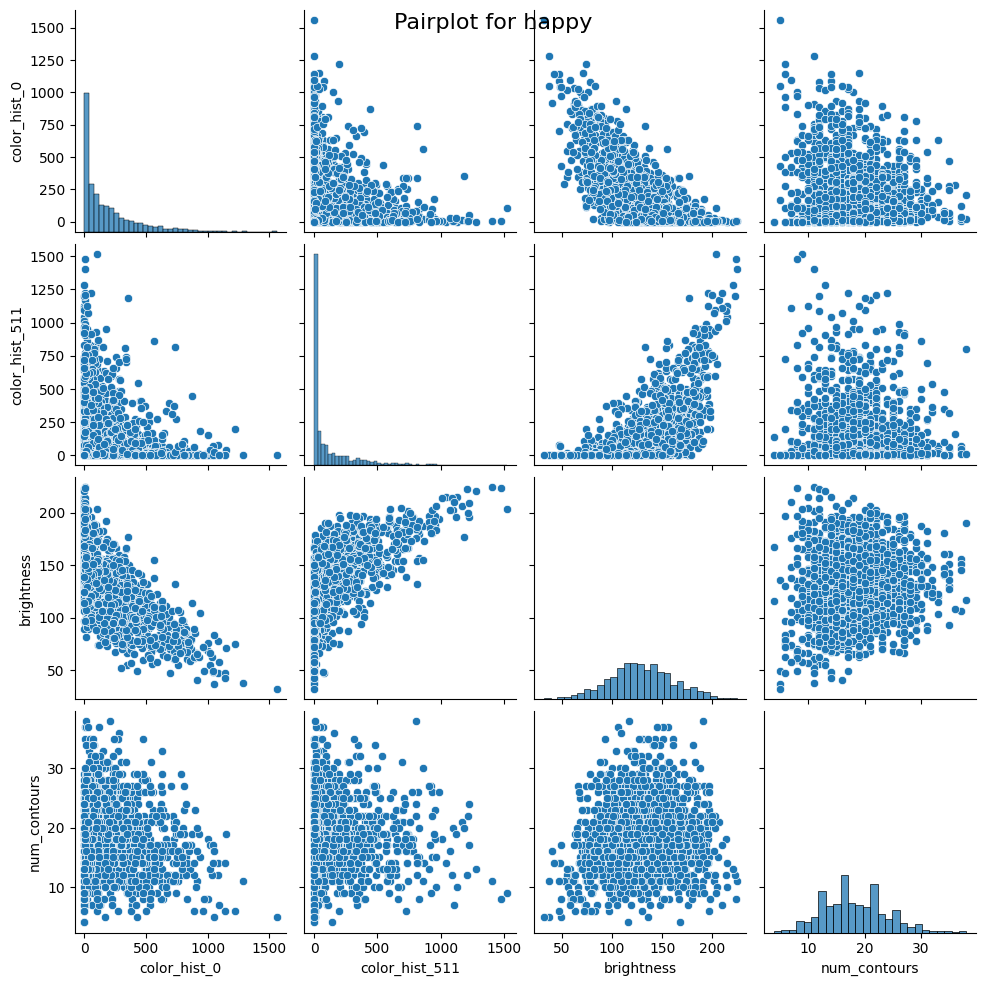

<Figure size 1000x800 with 0 Axes>

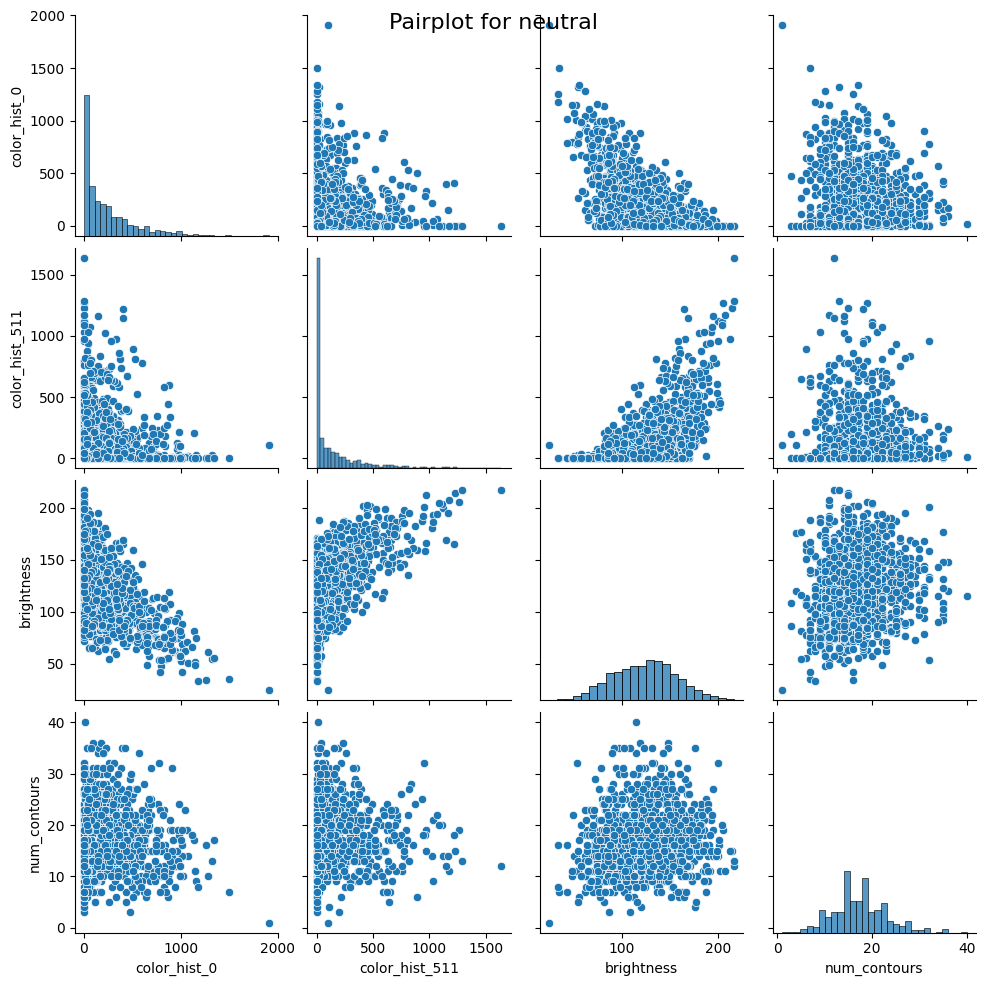

<Figure size 1000x800 with 0 Axes>

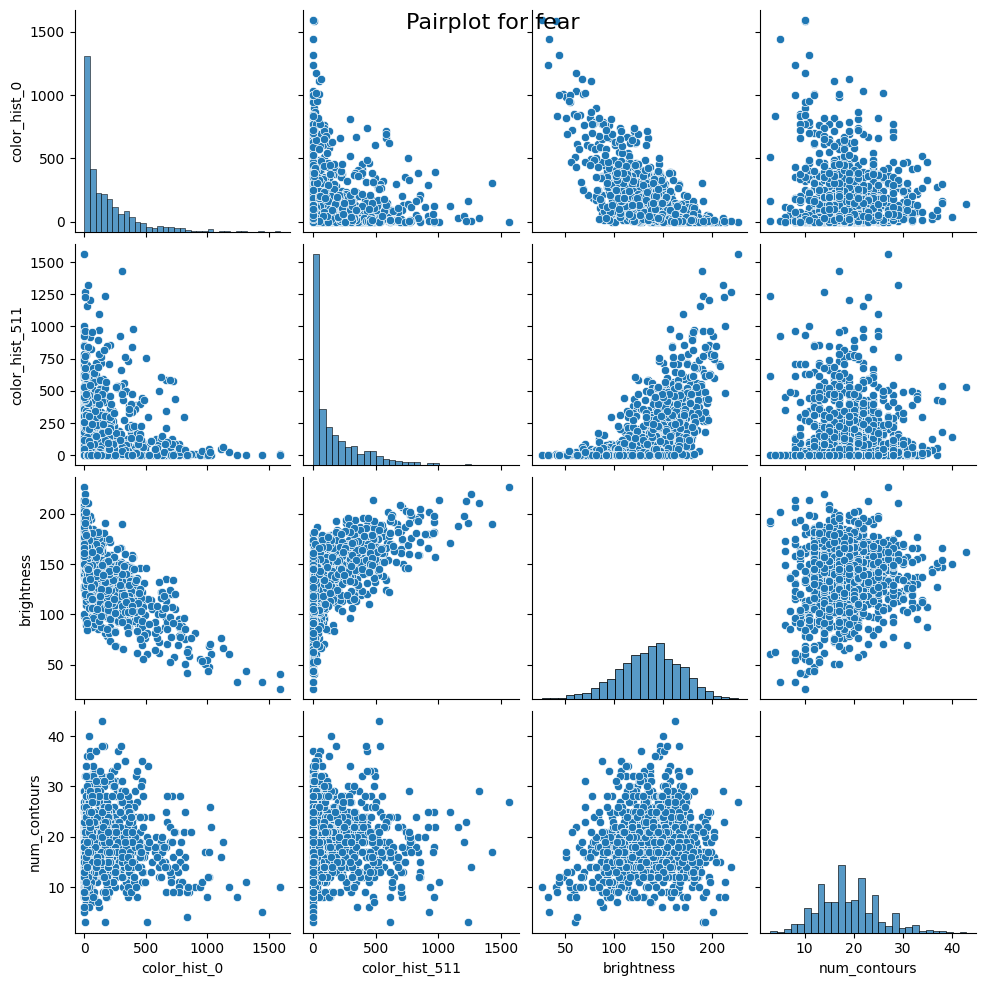

<Figure size 1000x800 with 0 Axes>

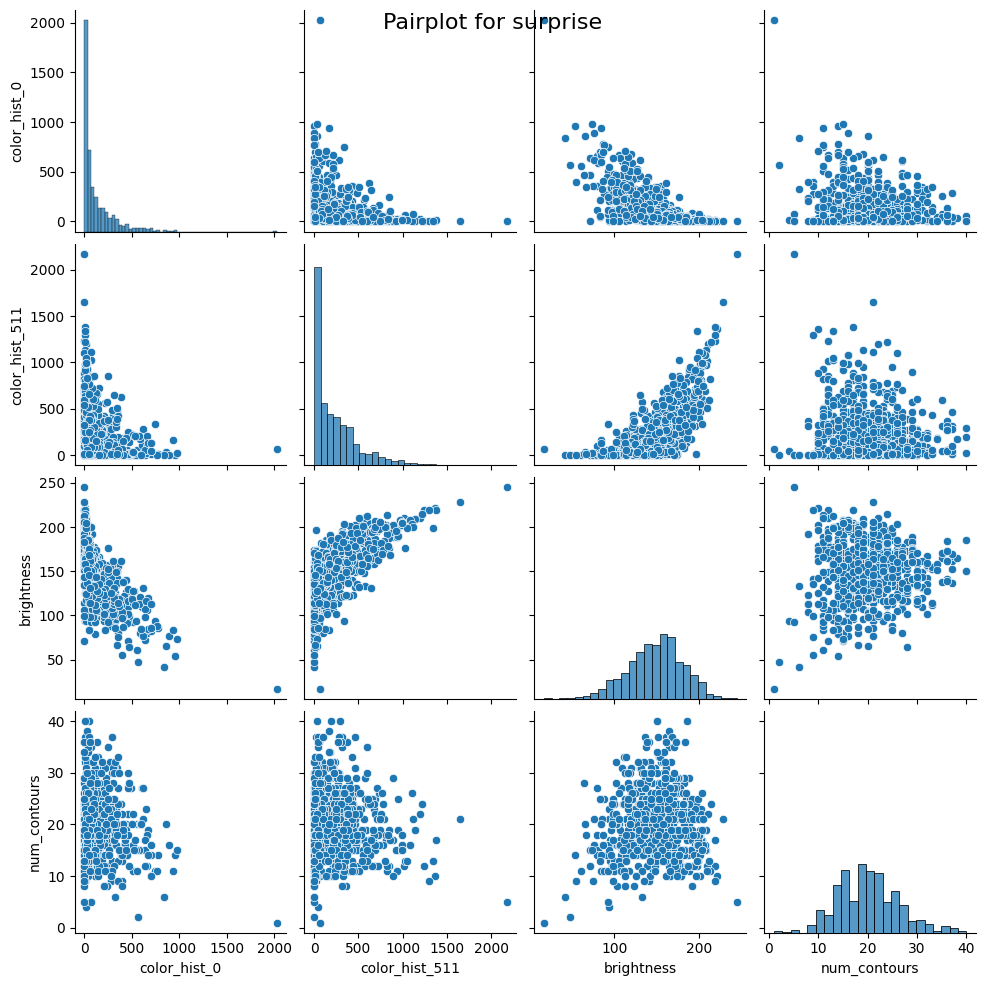

<Figure size 1000x800 with 0 Axes>

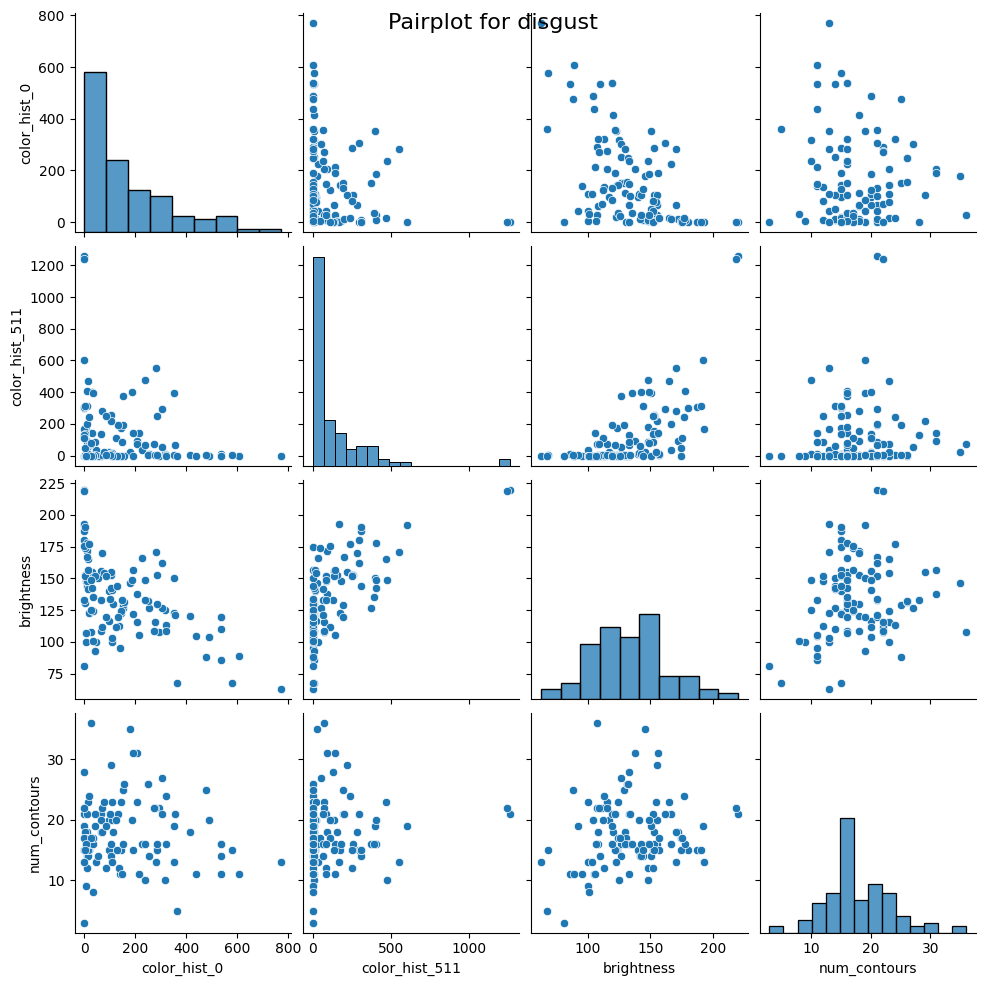

<Figure size 1000x800 with 0 Axes>

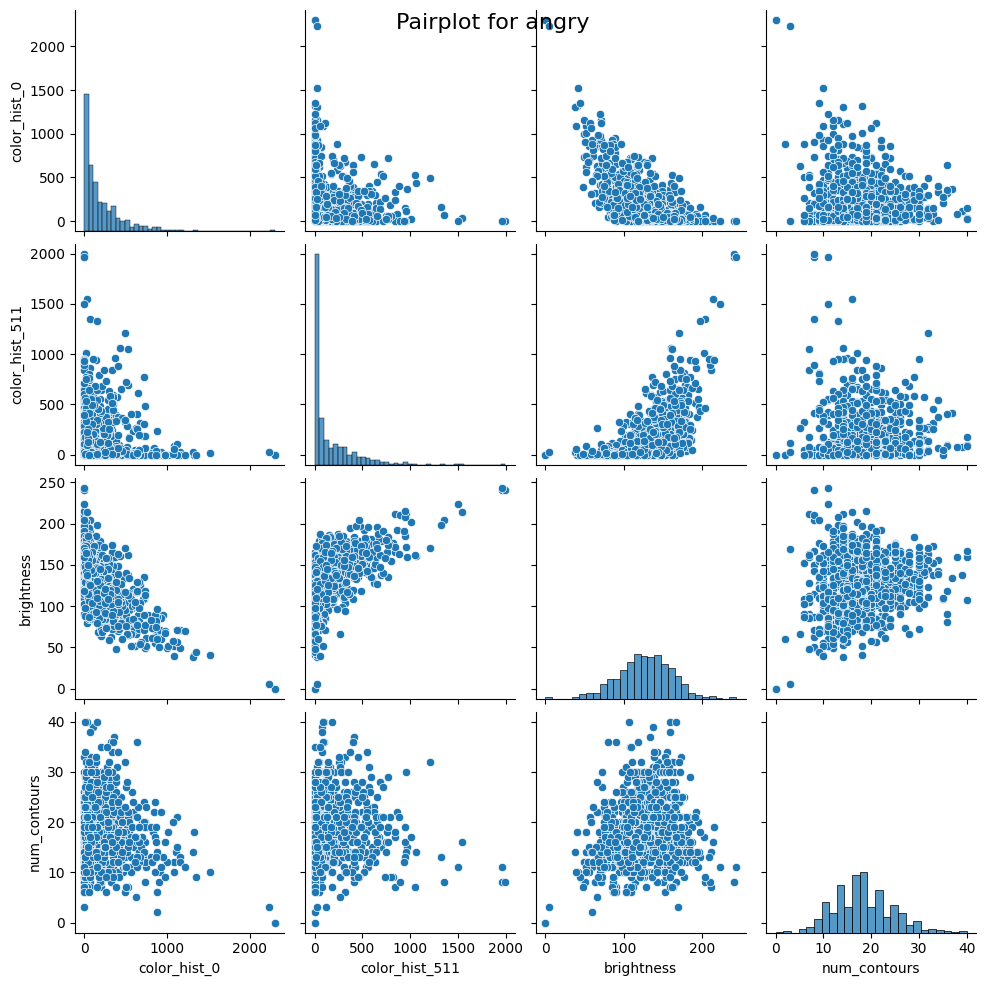

<Figure size 1000x800 with 0 Axes>

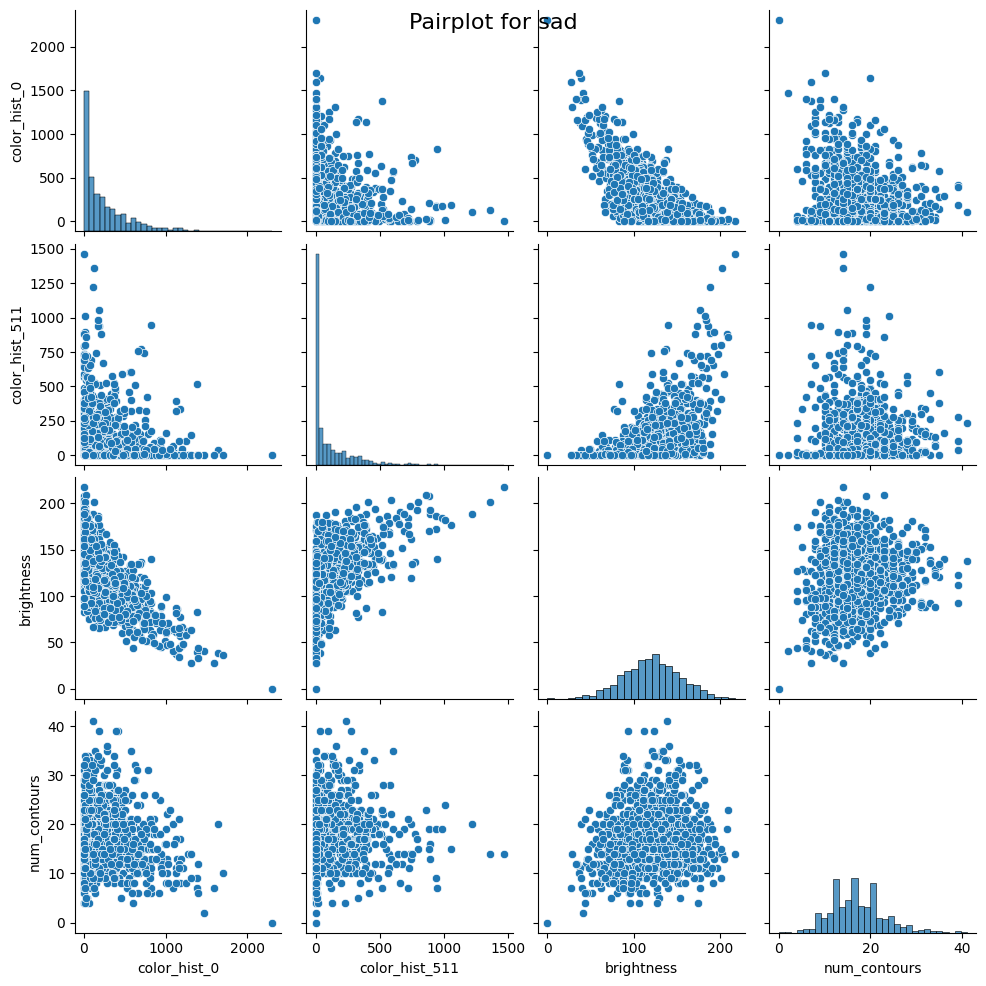

In [51]:
plot_histograms(df)
plot_boxplots(df)
plot_scatter(df)
plot_bar_chart(df)
plot_heatmap(df)
plot_pairplots(df)

Razlike su definitivno prisutne medju grupama emocija sto se tice raspodele po ostalim kolonama, to je zanimljivo! Hajde da vidimo da li je taj zakljucak verodostojan van okrilja vizuelne pretpostavke.

In [52]:
from scipy.stats import f_oneway, kruskal, chi2_contingency

anova_result = f_oneway(*[group['num_contours'] for name, group in df.groupby('emotion')])
print("ANOVA Test for num_contours:")
print(anova_result)

kruskal_result = kruskal(*[group['brightness'] for name, group in df.groupby('emotion')])
print("\nKruskal-Wallis H-test for brightness:")
print(kruskal_result)

ANOVA Test for num_contours:
F_onewayResult(statistic=26.314089885640133, pvalue=3.79608629811518e-31)

Kruskal-Wallis H-test for brightness:
KruskalResult(statistic=414.83462894871724, pvalue=1.8057285558137894e-86)


To potvrdjuju dalji statisticki testovi. Srednje vrednosti i medijane izmedju grupa se razlikuju. To znamo putem ANOVA i Kruskal Wallis testova.
